**Final Project**

Importing libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [256]:
df = pd.read_csv("/content/Australia_Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


Data Visualization

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

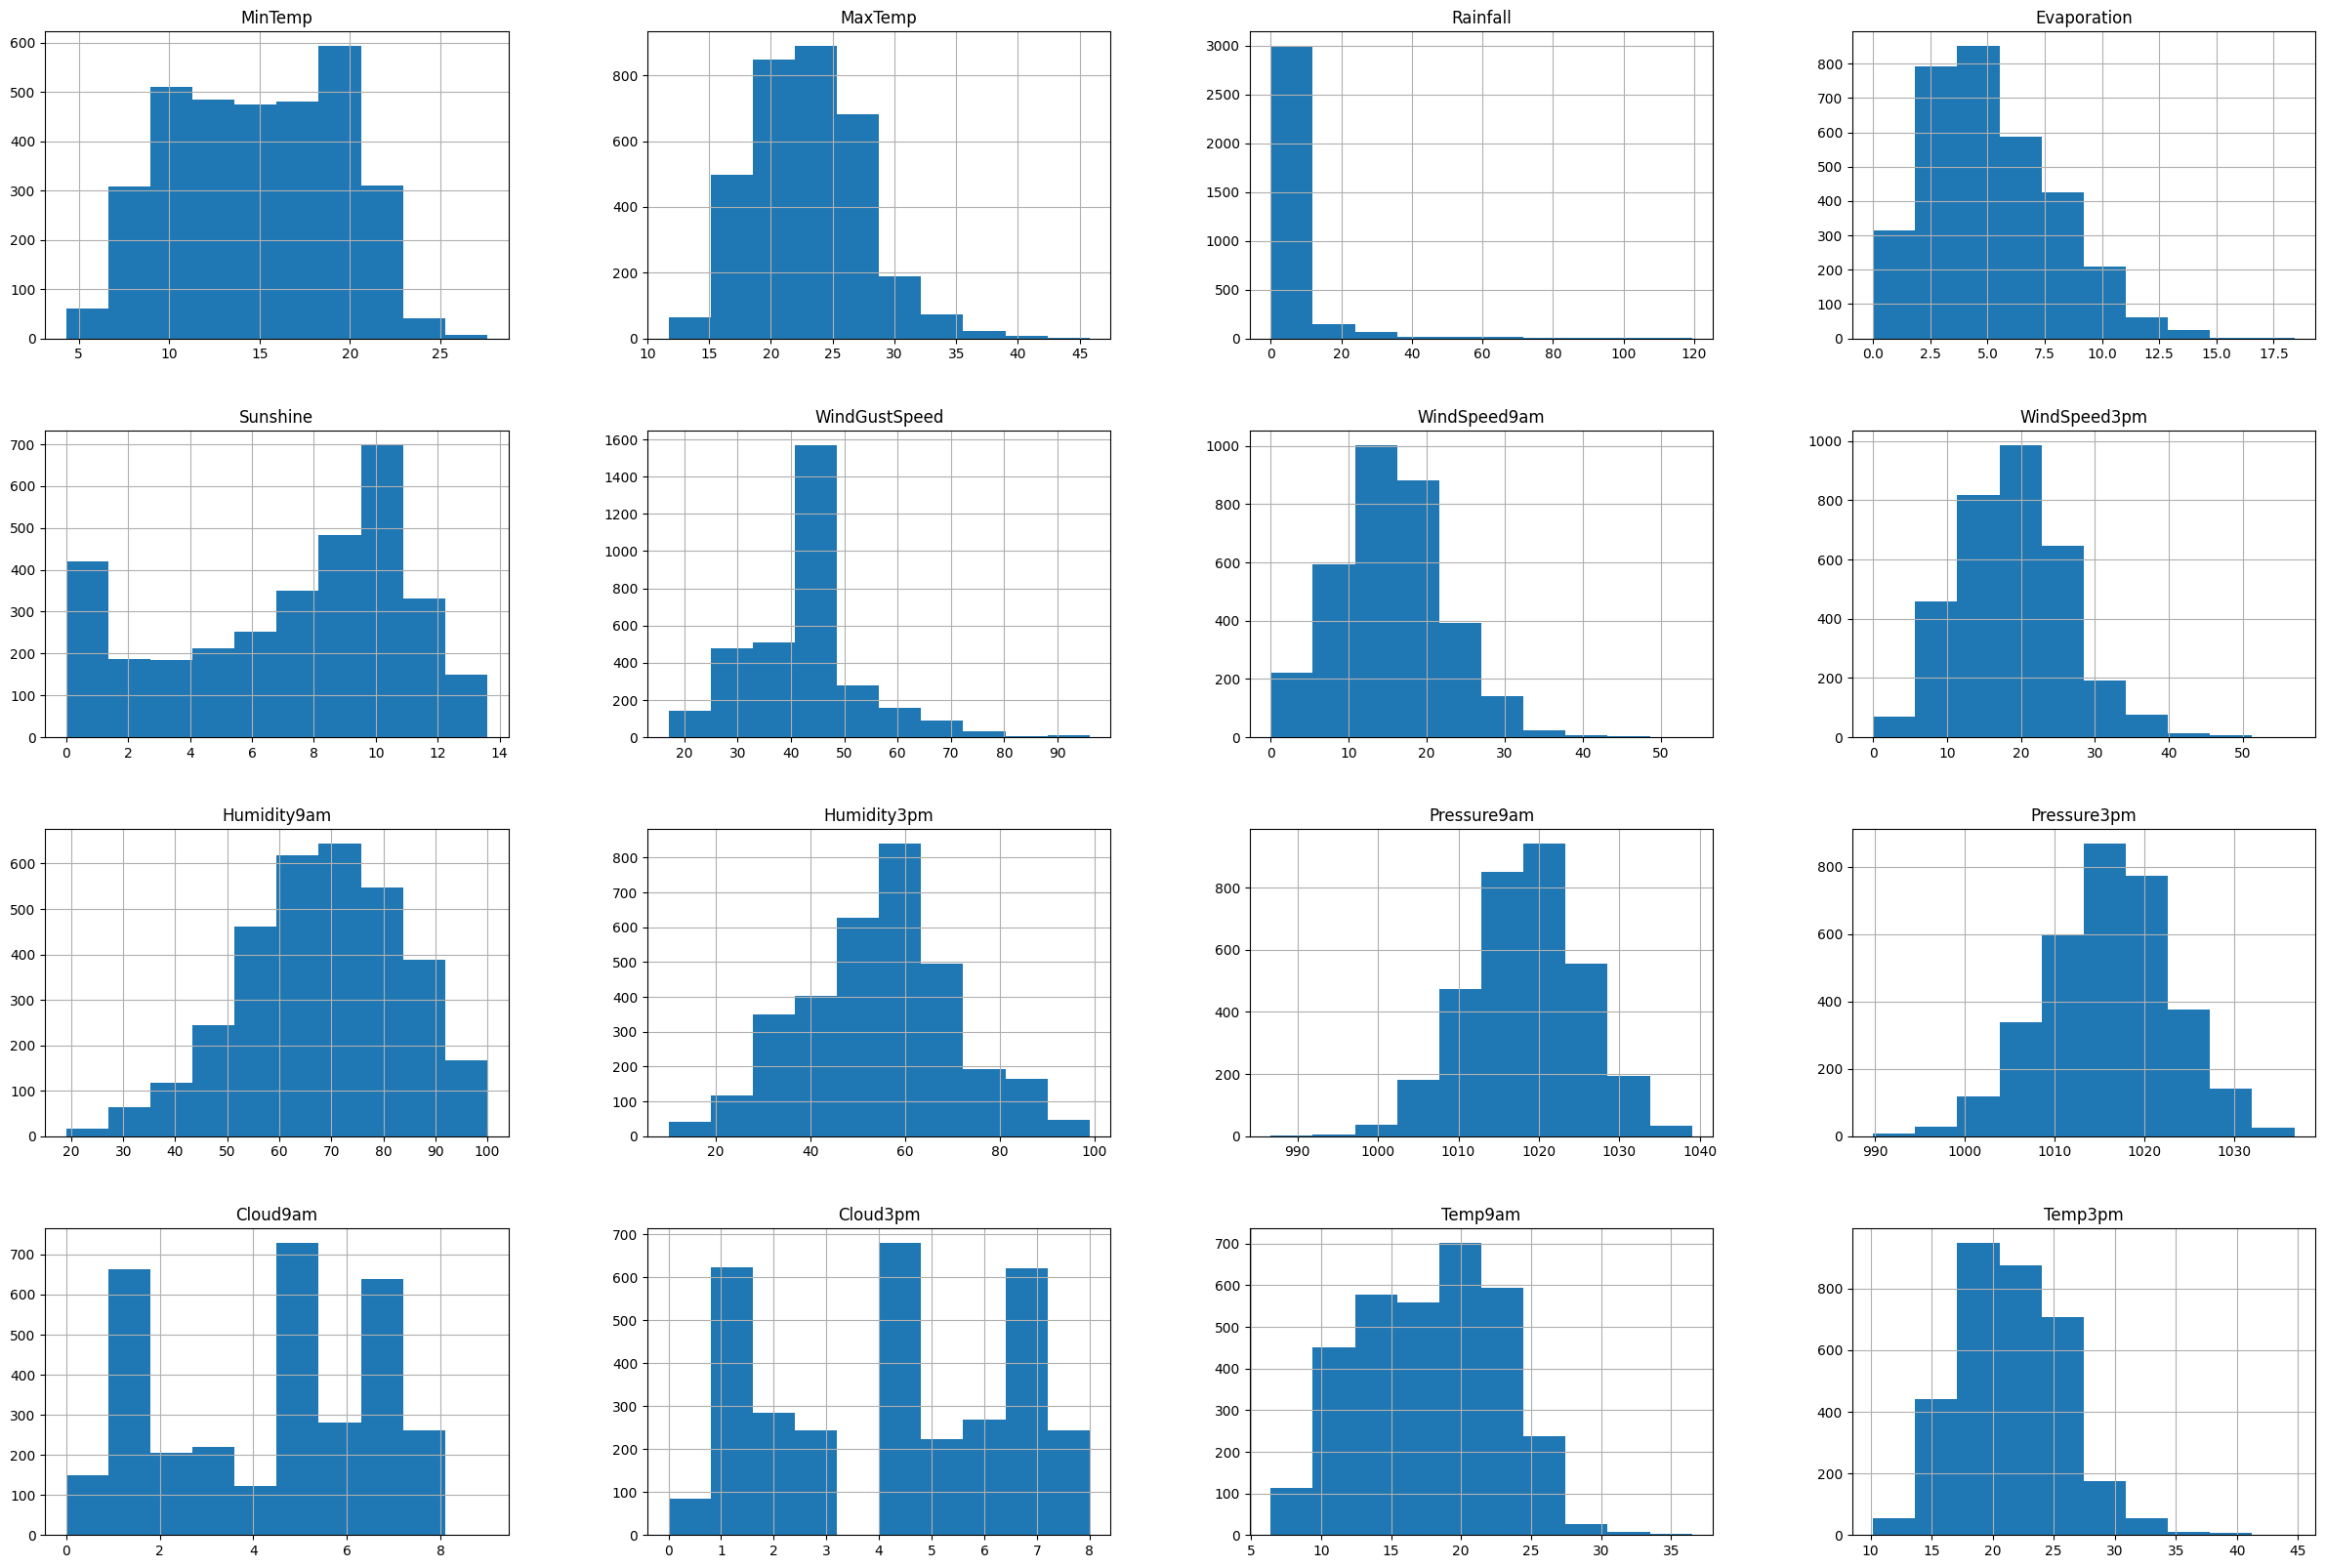

In [257]:
df.hist(figsize=(30, 20))

Step 1: Data Preprocessing


In [268]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,2422
Yes,849


In [274]:
df.replace('?', np.nan, inplace=True)

In [275]:
df.dropna(inplace=True)

In [276]:
df = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [285]:
df.replace(['No', 'Yes'], [0,1], inplace=True)

<ipython-input-285-22d482b62cff>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['No', 'Yes'], [0,1], inplace=True)


Feature and Target Selection

In [286]:
X = df.drop(['RainTomorrow', 'Date'], axis=1).values
y = df['RainTomorrow'].values

Normalization

In [287]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Step 2: Train/test split

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Algorithm Setup, prediction, evoluation

Linear Regression

In [291]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred.round()) * 100
print(f"Mean Absolute Error: {mae}");
print(f"Mean Squred Error: {mse}");
print(f"R2: {r2}");
print(f"Linear Regression Accuracy: {accuracy}")

Mean Absolute Error: 0.2705055875091547
Mean Squred Error: 0.13171943735916658
R2: 0.3367572929320637
Linear Regression Accuracy: 82.90076335877863


KNN

In [297]:
from sklearn.neighbors import KNeighborsClassifier
k=7
model2 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"KNN accuracy: {accuracy}")
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred.round()))

KNN accuracy: 77.70992366412214
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       476
           1       0.68      0.35      0.46       179

    accuracy                           0.78       655
   macro avg       0.74      0.64      0.66       655
weighted avg       0.76      0.78      0.75       655

[[447  29]
 [117  62]]


Decision Tree

In [298]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Decision Tree: {accuracy}")
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred.round()))

Decision Tree: 80.61068702290076
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       476
           1       0.73      0.46      0.57       179

    accuracy                           0.81       655
   macro avg       0.78      0.70      0.72       655
weighted avg       0.80      0.81      0.79       655

[[445  31]
 [ 96  83]]


Logistic Regression

In [299]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression: {accuracy}")
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred.round()))

Logistic Regression: 82.90076335877863
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       476
           1       0.73      0.60      0.66       179

    accuracy                           0.83       655
   macro avg       0.79      0.76      0.77       655
weighted avg       0.82      0.83      0.82       655

[[436  40]
 [ 72 107]]


SVM

In [300]:
from sklearn import svm
model5 = svm.SVC(kernel='rbf')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM: {accuracy}")
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred.round()))

SVM: 82.59541984732824
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       476
           1       0.76      0.54      0.63       179

    accuracy                           0.83       655
   macro avg       0.80      0.74      0.76       655
weighted avg       0.82      0.83      0.82       655

[[445  31]
 [ 83  96]]


Random Forest

In [301]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(
    n_estimators=500,  # Increase number of trees
    max_depth=20,      # Limit depth to prevent overfitting
    min_samples_split=10,  # Higher min samples per split
    min_samples_leaf=5,    # Higher min samples per leaf
    max_features='sqrt',   # Number of features to consider for splitting
    random_state=42,

)


model6.fit(X_train, y_train)


y_pred = model6.predict(X_test)


accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM: {accuracy}")
print (classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred.round()))

SVM: 82.59541984732824
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       476
           1       0.78      0.50      0.61       179

    accuracy                           0.83       655
   macro avg       0.81      0.73      0.75       655
weighted avg       0.82      0.83      0.81       655

[[451  25]
 [ 89  90]]
